# Study of Real Estate Listings

The data is provided by the `Yandex.Real Estate` service and represents an archive of apartment sale listings in St. Petersburg and neighboring localities from 2014-2019. The aim of the study is to establish parameters for automating the evaluation of the market value of real estate properties.

For each real estate object in the dataset, two types of data are available: the first type is entered by the user, and the second type is obtained automatically based on mapping data (e.g., distance to the center, airport, nearest park, and body of water).

**Research Objective:** establishing parameters for automating the determination of real estate objects market value

**Research Tasks:**

- Assess the suitability of the initial data for further analysis and conduct data preprocessing.
- Identify the most frequent as well as rare values of various real estate parameters.
- Analyze the impact of different parameters on the overall value of the properties.
- Calculate the price per square meter of real estate.
- Formulate criteria for the automatic determination of real estate value.

## Summary of the Analysis Results

Properties with the highest frequency are characterized by:

- a total area of 25-60 square meters;
- a living area of 15-22 square meters or 27-32 square meters (predominantly apartments);
- a kitchen area of 5-15 square meters;
- a price of 3-6 million rubles;
- 1-3 rooms;
- not being located on the first or last floor;
- being in buildings with 5 and 9 floors;
- being 10-18 km from the city center;
- having the nearest park within 500 meters from the house.
  
For small and medium properties with total area up to 130 square meters, living area up to 75 square meters, kitchen area up to 15 square meters, and up to 4 rooms, the area and number of rooms have a direct influence on the total cost. As the area of the property increases, the correlation decreases, and other parameters of the property start to have a stronger impact on the cost.

Being located on the first and last floor has a negative impact on the overall cost.

The real estate market in the Leningrad region is characterized by seasonality, with peaks in listed property cost (as a result of increased demand) in April, September, and November. The market also directly dependents on the general economic situation in the country.

Localities with the highest price per square meter are Zelenogorsk and St. Petersburg, while the cheapest real estate is in the village of Staropolye.

As the distance from the center increases, the cost of real estate steadily decreases from 0 to 25 km. Beyond that, it sharply increases when apartments are located in elite peripheral areas at a distance of 25 to 30 km from the center.

## Data Overview

ИImporting the necessary libraries for data analysis:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
from IPython.display import display, HTML

Reading the file `real_estate_data.csv` with the data (the path to the data is stored in a JSON file) and saving it in the variable `data`:

In [2]:
#Reading of JSON file
with open('config.json', 'r', encoding='utf-8') as f:
    config = json.load(f)

# Reading the CSV file using the path from the JSON file
dataset_path = config['dataset_path_estate']
data = pd.read_csv(dataset_path, sep="\t")

Removing the restrictions on displaying the number of columns, rows, and column width.

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Displaying the first 10 rows of the dataframe `data` on the screen.

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Displaying the main information about the data frame using the `info()` method.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Building histograms for all numeric columns in the table.

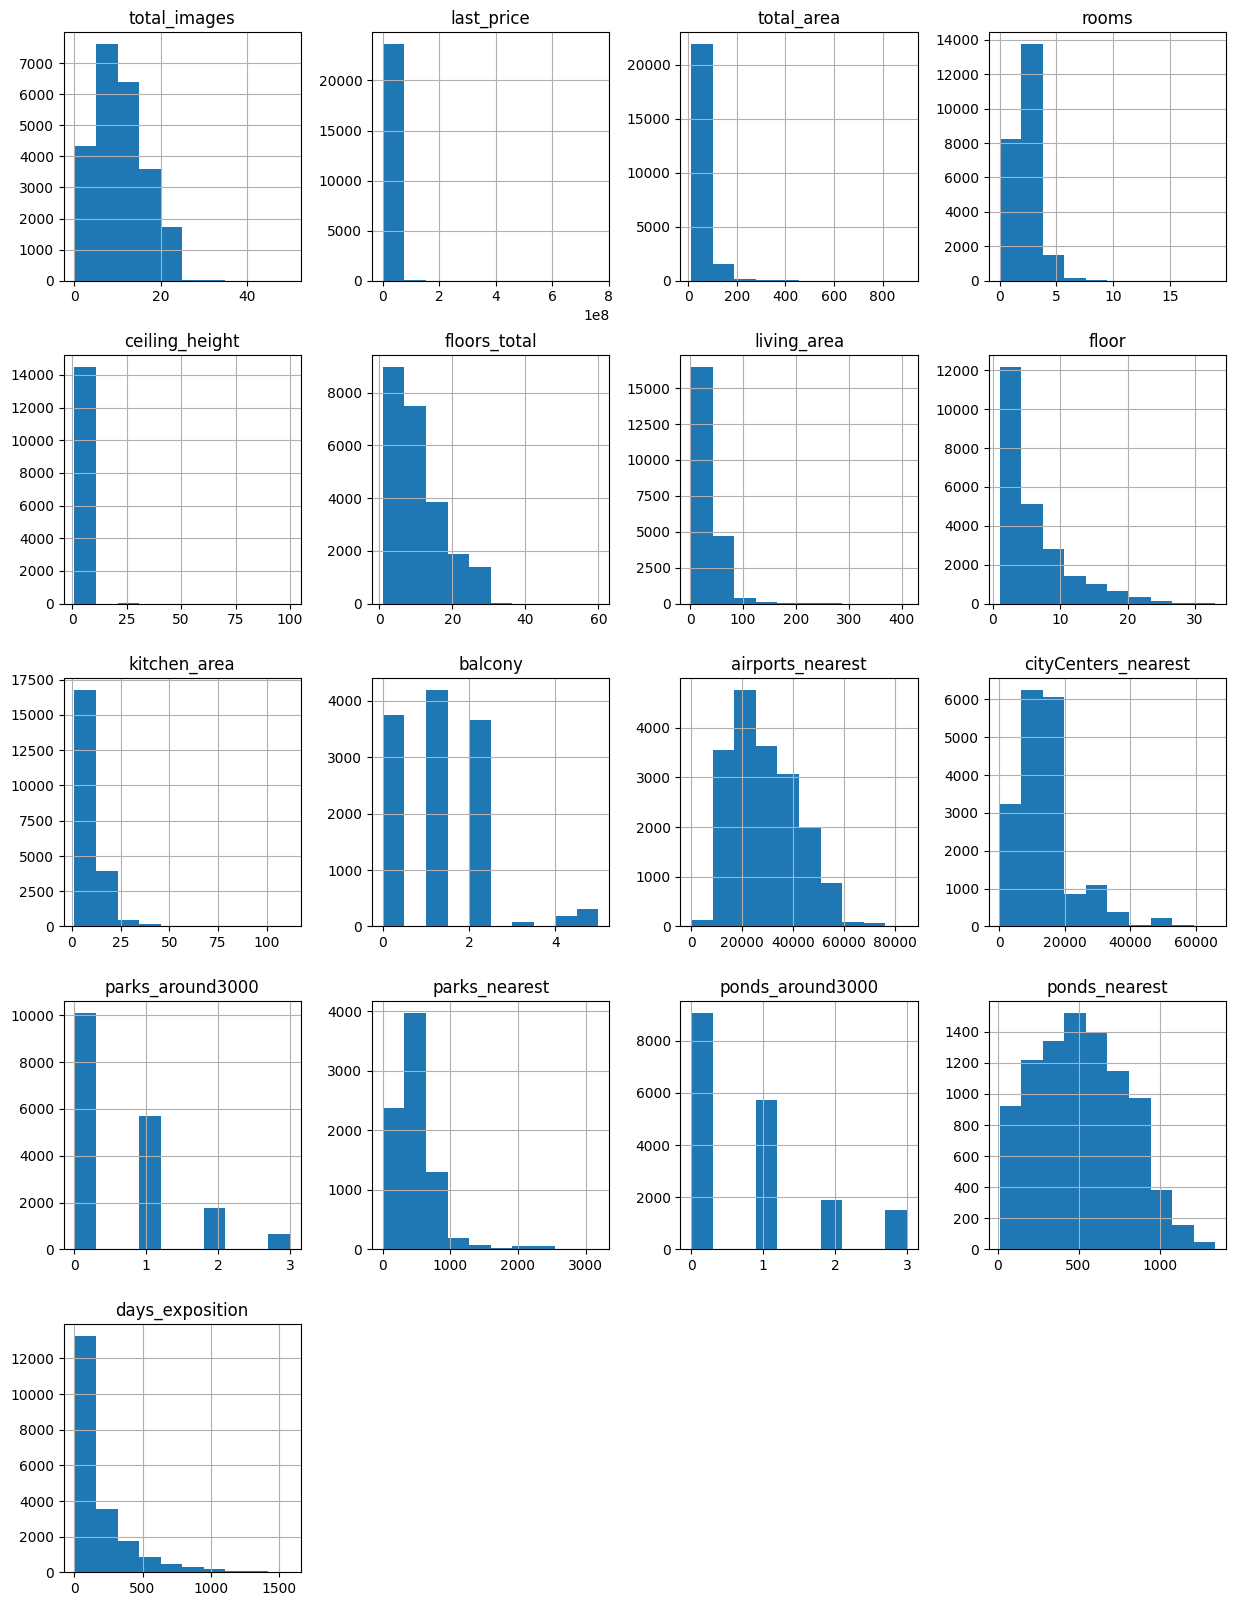

In [6]:
data.hist(figsize=(15, 20));

All columns contain data, but the completeness of this data varies across columns. From the generated diagrams, it is evident that some columns have abnormally high values. In the further course of the study, it will be necessary to assess which of these values are critically important for the analysis and which can be excluded.

## Data Preprocessing

### Filling in the Gaps

At this stage, we will identify and, if possible, eliminate missing values in the columns, and, if necessary, adjust the data types in the columns for further analysis.

Displaying the number of missing values for each column.

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Determining the possibility of filling in the missing values for each of the columns.

**Ceiling_height Column**

For the `ceiling_height` column, one could assume that its values depend on the total area of the property. In this case, it would be possible to group the data by area and calculate the median ceiling height for each group. Let's test this hypothesis by calculating the correlation coefficient:

In [8]:
data['ceiling_height'].corr(data['total_area']).round(3)

0.095

Due to the extremely low correlation coefficient, we will leave the missing values in the `ceiling_height` column unfilled.

**Floors_total Column**

Since the number of missing values in the `floors_total` column is extremely low (86 out of 23,699) compared to the total number of values in the table, we will fill them with values from the `floor` column:

In [9]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])

**Living_area Column**

To fill in the missing values in the `living_area` column, let's find the correlation between its values and the values in the `total_area` column.

In [10]:
data['living_area'].corr(data['total_area']).round(3)

0.94

The results show a strong positive correlation since it tends towards one.
Displaying a histogram and a list of characteristic values for the `total_area` column.

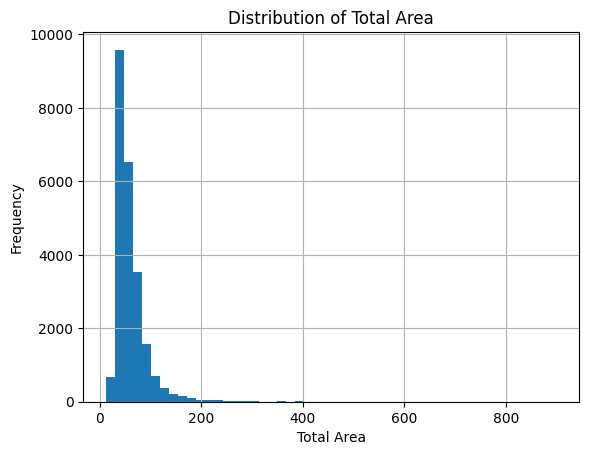

In [11]:
data['total_area'].hist(bins=50)
plt.title('Distribution of Total Area')
plt.xlabel('Total Area')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Displaying the description of the `total_area` column
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Since there are no missing values in this column, we will use the quartile values of the `total_area` column to build a function that will group real estate properties based on their area:

In [13]:
def area_size(size):
    """
    The function classifies the area of an object into four categories: 'Small', 'Medium',
    'Large', and 'Extra_Large' depending on the value of 'size'.

    Parameters:
    size (int or float): The area to be classified.

    Returns:
    str: The size category ('Small', 'Medium', 'Large', 'Extra_Large').
    """
    try:
        if 12 <= size <= 40:
            return 'Small'
        elif 40 <= size <= 52:
            return 'Medium'
        elif 52 <= size <= 69:
            return 'Large'
        elif size >= 69:
            return 'Extra_Large'
    except:
        pass

In [14]:
# Creating a new column with the size category of the real estate property
data['total_area_category'] = data['total_area'].apply(area_size)

Filling in of the missing values in the `living_area` column with the median values of the living area based on the property size category:

In [15]:
for t in data['total_area_category'].unique():
    data.loc[(data['total_area_category'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['total_area_category'] == t), 'living_area'].median()

**Is_apartment Column**

Displaying the unique values for this column:

In [16]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In the column, there are either boolean values present or values that are missing. In this context, it is logical to assume that if the property owner did not specifically mark it, the property is not an apartment. Therefore, we will replace all missing values with `False`:

In [17]:
data['is_apartment'] = data['is_apartment'].fillna('False')

**Kitchen_area Column**

Filling in of the missing values in the `kitchen_area` column similarly to the `living_area` column:

In [18]:
for t in data['total_area_category'].unique():
    data.loc[(data['total_area_category'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['total_area_category'] == t), 'kitchen_area'].median()

**Balcony Column**

Displaying the unique values of the `balcony` column.

In [19]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Here, it is also logical to assume that if the owner did not specify information on the number of balconies, the property does not have any. Therefore, we will replace missing values with 0:

In [20]:
data['balcony'] = data['balcony'].fillna(0)

**Locality_name Column**

Since the number of the missing values in the `locality_name` column is extremely small, and it is not possible to recover the missing values based on the present data, we suggest leaving the missing values in this column unfilled.

For further addressing the missing values in the data, we suggest addressing the data discrepancies in the `locality_name` column by removing implicit duplicates. First, let's display the list of unique values in this column, sort it, and count the number of values:

In [21]:
# Changing the data type in the 'locality_name' column to str
data['locality_name'] = data['locality_name'].astype(str)

In [111]:
# Displaying the list of unique values for the location of properties
unique_locations = sorted(data['locality_name'].unique())
unique_locations_df = pd.DataFrame(unique_locations, columns=['locality_name'])

unique_locations_df_st = f'''
<div style="max-height:200px; overflow:auto;">
    {unique_locations_df.to_html(index=False)}
</div>
'''

display(HTML(unique_locations_df_st))

locality_name
nan
Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород


In [23]:
# Displaying the length of the list of unique values
len(unique_locations)

365

As seen from the list, a large number of duplicates are caused by alternating the letters "е" and "ё". Let's replace all instances of the letter "ё" with "е":

In [24]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

Checking if the list of unique values has decreased after standardizing the writing style of locality names:

In [25]:
len(data['locality_name'].unique())

331

Removal of the remaining implicit duplicates that have been identified:

In [26]:
data['locality_name'] = data['locality_name'].replace('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора')
data['locality_name'] = data['locality_name'].replace('городской поселок Лесогорский', 'поселок городского типа Лесогорский')
data['locality_name'] = data['locality_name'].replace('городской поселок Мга', 'поселок городского типа Мга')
data['locality_name'] = data['locality_name'].replace('городской поселок Назия', 'поселок городского типа Назия')
data['locality_name'] = data['locality_name'].replace('городской поселок Павлово', 'поселок городского типа Павлово')
data['locality_name'] = data['locality_name'].replace('городской поселок Рощино', 'поселок городского типа Рощино')
data['locality_name'] = data['locality_name'].replace('городской поселок Советский', 'поселок городского типа Советский')
data['locality_name'] = data['locality_name'].replace('поселок Лесное', 'коттеджный поселок Лесное')
data['locality_name'] = data['locality_name'].replace('поселок Рябово', 'поселок городского типа Рябово')
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Вещево', 'поселок станции Вещево')
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское')

**Airports_nearest Column**

Let's analyze how many times "Saint Petersburg" is mentioned in the column compared to other localities, and also calculate the minimum non-zero and maximum distances from Saint Petersburg to the nearest airport.

In [27]:
# Displaying the number of properties located in Saint Petersburg
data.loc[data['locality_name'] == 'Санкт-Петербург']['locality_name'].count()

15721

In [28]:
# Displaying the minimum distance from residential properties to the airport in Saint Petersburg
data.loc[(data['locality_name'] == 'Санкт-Петербург') & (data['airports_nearest'] != 0)]['airports_nearest'].min()

6450.0

In [29]:
# Displaying the maximum distance from residential properties to the airport in Saint Petersburg
data.loc[(data['locality_name'] == 'Санкт-Петербург')]['airports_nearest'].max()

54784.0

Since the results show that Saint Petersburg predominates as the specified locality, and there is a significant variation in values in the `airports_nearest` column, using median values from grouping by localities to fill in missing values in the `airports_nearest` column would heavily distort the overall dataset. Therefore, we will leave this column unchanged.

**CityCenters_nearest, Parks_nearest and Ponds_nearest Columns**

Filling missing values in these columns with median values can heavily distort the overall dataset. Since the data is automatically extracted by the system and not filled in by property owners, it would make sense to request a re-extraction of the data, indicating the presence of missing values.

**Parks_around3000 Column**

Displaying the list of unique values in this column.

In [30]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

It's logical to assume that the absence of values in the `parks_around3000` column indicates their absence within the specified radius. To eliminate the possibility of error, let's check if there are any cases where the `parks_nearest` column contains data when there are missing values in the `parks_around3000` column:

In [31]:
data.loc[(data['parks_around3000'].isna())&(~data['parks_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category


Since the absence of values confirms our theory, let's replace the missing values in the `parks_around3000` column with zero values:

In [32]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

**Ponds_around3000 Column**

Performing the same actions for this column as we did for the `parks_around3000` column:

In [33]:
# Displaying the list of unique values:
data['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [34]:
# Displaying the rows where there is no data on the presence of a water body within a 3 km radius, 
# but there is data on the number of nearby water bodies
data.loc[(data['ponds_around3000'].isna())&(~data['ponds_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category


In [35]:
# Filling of the missing values in the 'ponds_around3000' column with zero values
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

**Days_exposition Column**

Since the column stores information about the number of days that have passed from the publication date to the removal date, and no information on the last day of exposition, it is not possible to restore the missing data based on the existing one. Since the data in this column is filled automatically, it makes sense to request a re-extraction of the data in the future, pointing out the presence of missing values.

### Changing the Data Types for the Columns

Since the data type in several columns does not match the values they contain, we will make the necessary changes.

Rewriting the values in the `first_day_exposition` column in the `datetime` format::

In [36]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Earlier we removed all the missing values in the `is_apartment` column by replacing them with `False`, but the data type remained as `object`. Now let's change the data type in the column to boolean values:

In [37]:
data['is_apartment'] = data['is_apartment'].astype(bool)

Since the number of balconies can only be an integer value, let's change the data type of this column to `int`:

In [38]:
data['balcony'] = data['balcony'].astype(int)

Similarly, let's change the data types to `int` for the columns `floors_total`, `parks_around3000`, and `ponds_around3000`:

In [39]:
data['floors_total'] = data['floors_total'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

It's also worth noting that earlier the data type in the `locality_name` column was changed to `str` to enable sorting and making changes to alphabetical values.

Additionally, judging by the data in the `last_price` column, the property price is indicated in rubles. Due to the large size of the numbers for the convenience of further analysis, we will convert the data to thousands of rubles and round to two decimal places:

In [40]:
data['last_price'] = data['last_price']/1000
data['last_price'] = data['last_price'].round(2)

Overall, it can be concluded that the main reason for missing values is a technical issue during automatic data filling.

During the analysis, missing values remained in the columns `ceiling_height`, `locality_name`, `days_exposition` (impossible to fill based on existing data), `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest` (since data is filled automatically from the system, it makes sense to request a re-upload of data, indicating the presence of the missing values).

Missing values in the columns `living_area`, `kitchen_area` were filled with median values. A few missing values in the columns `floors_total` were filled with the values from the `floor` column; in the `is_apartment` column - with boolean value `False`; in `balcony`, `parks_around3000`, `ponds_around3000` - with zero values.

In addition, data types were changed in the columns `first_day_exposition` (date), `is_apartment` (boolean values), `balcony`, `floors_total`, `parks_around3000`, `ponds_around3000` (integers), `locality_name` (string), and the data in the `last_price` column were overwritten to be expressed in thousands of rubles for the convenience of displaying reference and summary tables, as well as subsequent visualization.

### Adding Additional Columns

To further conduct the research, let's add the following additional columns to the original table:

- Price per square meter (in thousands of rubles, rounded to 3 decimal places).
- Day of the week the ad was published (0 - Monday, 1 - Tuesday, and so on).
- Month of the ad publication.
- Year of the ad publication.
- Floor type of the apartment (values - "first", "last", "other").
- Distance to the city center in kilometers (convert from meters to kilometers and round to the nearest integer values).

In [41]:
# Adding a column with the price per square meter of the property
data['square_metre_price'] = data['last_price']/data['total_area']
data['square_metre_price'] = data['square_metre_price'].round(3)

In [42]:
# Adding a column with the day of the week when the ad was posted
data['weekday'] = data['first_day_exposition'].dt.weekday

In [43]:
# Adding a column with the month when the ad was posted
data['month'] = data['first_day_exposition'].dt.month

In [44]:
# Adding a column with the year when the ad was posted
data['year'] = data['first_day_exposition'].dt.year

In [45]:
def floor_category(row):
    """
    The function takes a row from a DataFrame and categorizes the floor number of the apartment
    based on the following criteria:
    - 'first': if the apartment is on the first floor.
    - 'last': if the apartment is on the last floor.
    - 'other': if the apartment is on any other floor.
    
    Parameters:
    row (pd.Series): A data row containing the columns 'floors_total' and 'floor'.
    
    Returns:
    str: A string representing the floor category.
    """
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'first'
    elif floor == floors_total:
        return 'last'
    elif 1 < floor < floors_total:
        return 'other'

In [46]:
# Adding a column with the floor type
data['floor_category'] = data.apply(floor_category, axis = 1)

In [47]:
# Converting values in the column with data about the distance to the city center from meters to kilometers
data['cityCenters_nearest'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest'] = data['cityCenters_nearest'].round(0)

## Exploratory Data Analysis

Let's examine the parameters listed below for the properties and create separate histograms for each of these parameters. If there are rare or outlier values in the parameters when creating histograms, we'll remove them.

List of parameters:

- Total area
- Living area
- Kitchen area
- Property price
- Number of rooms
- Ceiling height
- Floor category (First, Last, Other)
- Total number of floors in the building
- Distance to the city center
- Distance to the nearest park
- Speed of apartment sales

NB: The original dataset `data` is used for data analysis in this section. Filtered values based on certain criteria are stored in the dataset `data_opt`.

### Total Area

In [48]:
# Displaying the data description of the column
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

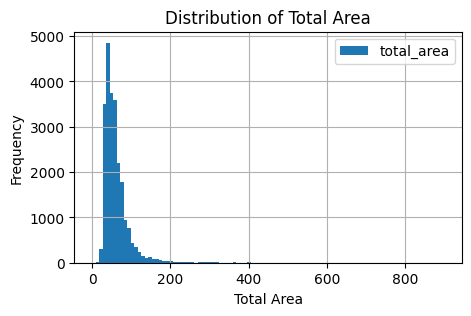

In [49]:
# Displaying the histogram
data.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(5,3), range=(0,900))
plt.title('Distribution of Total Area')
plt.xlabel('Total Area')
plt.ylabel('Frequency')
plt.show()

In [50]:
# Calculatштп the percentage of properties with a total area exceeding 300 square meters
(data.loc[data['total_area'] > 300]['total_area'].count()/data['total_area'].count()).round(3)

0.003

The data conforms to the parameters of a normal distribution, with the mean not significantly differing from the median. The majority of properties are in the range of 25 to 60 square meters. Values exceeding 300 square meters stand out sharply. Since their proportion in the overall dataset is less than 1%, we'll exclude them from further analysis.

In [51]:
# Excluding properties with a total area exceeding 300 square meters from the analysis
data_opt = data.loc[data['total_area'] <= 300]

### Living Area

In [52]:
# Displaying the data description of the column
data['living_area'].describe()

count    23699.000000
mean        34.355259
std         21.425062
min          2.000000
25%         18.600000
50%         30.000000
75%         42.400000
max        409.700000
Name: living_area, dtype: float64

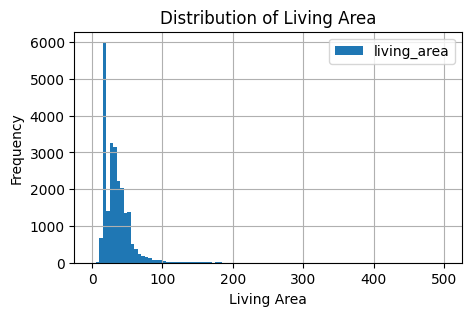

In [53]:
# Displaying the histogramDisplayшта the histogram
data.plot(y='living_area', kind='hist', bins=100, grid=True, figsize=(5,3), range=(0,500))
plt.title('Distribution of Living Area')
plt.xlabel('Living Area')
plt.ylabel('Frequency')
plt.show();

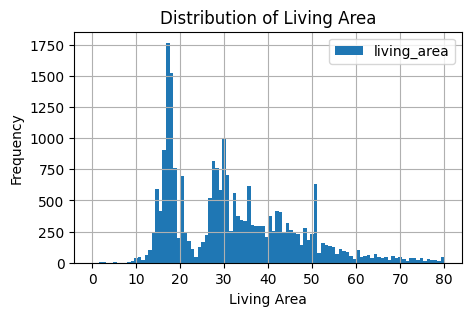

In [54]:
# Displaying the histogramDisplayшта the histogram
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,80))
plt.title('Distribution of Living Area')
plt.xlabel('Living Area')
plt.ylabel('Frequency')
plt.show();

In [55]:
# Calculating the percentage of properties with a living area above 200 square meters
(data.loc[data['living_area'] > 200]['living_area'].count()/data['living_area'].count()).round(3)

0.001

In [56]:
# Displaying the count of real estate properties classified as "apartments" 
# with an area between 22 and 27 square meters
data.loc[(data['living_area'] > 22) & (data['living_area'] < 27) & (data['is_apartment'] == True)] \
['living_area'].count() / \
data.loc[(data['living_area'] > 22) & (data['living_area'] < 27)]['living_area'].count()

0.8822843822843823

While the median value is not significantly different from the mean, the data does not conform to the parameters of a normal distribution. There are two distinct peaks in the data: one in the range of 15 to 22 square meters and another in the range of 27 to 32 square meters.

Upon closer analysis, it was found that nearly 90% of real estate properties with living areas between 22 and 27 square meters are classified as "apartments." These properties have an atypical living area for the market while being sparsely represented, creating an anomaly in the data. Values exceeding 200 square meters are notably distinct. Since their proportion in the overall dataset is less than 1%, we will exclude these values from further analysis.

In [57]:
# Excluding properties with a living area exceeding 200 square meters from the analysis
data_opt = data_opt.loc[data_opt['living_area'] <= 200]

### Kitchen Area

In [58]:
# Displaying the data description of the column
data['kitchen_area'].describe()

count    23699.000000
mean        10.454538
std          5.657222
min          1.300000
25%          7.400000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

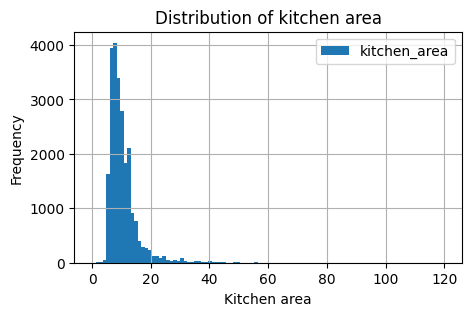

In [59]:
# Displaying the histogramDisplayшта the histogram
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,120))
plt.title('Distribution of kitchen area')
plt.xlabel('Kitchen area')
plt.ylabel('Frequency')
plt.show();

In [60]:
# Calculating the percentage of properties with kitchen area over 40 square meters
(data.loc[data['kitchen_area'] > 40]['kitchen_area'].count()/data['kitchen_area'].count()).round(3)

0.006

The data conforms to the parameters of a normal distribution, with the median value not significantly differing from the mean. Since the overall proportion of values above 40 square meters is significantly less than 1% of the total dataset, we will exclude these values from further analysis.

In [61]:
# Excluding properties with a kitchen area of over 40 square meters from the analysis
data_opt = data_opt.loc[data_opt['kitchen_area'] <= 40]

### Property Price

In [62]:
# Displaying the data description of the column
data['last_price'].describe()

count     23699.000000
mean       6541.548770
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

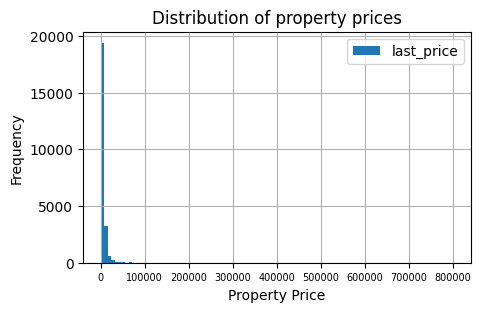

In [63]:
# Displaying the histogramDisplayшта the histogram
data.plot(y ='last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,800000))
plt.title('Distribution of property prices')
plt.xlabel('Property Price')
plt.ylabel('Frequency')
plt.xticks(rotation=0, fontsize=7)
plt.show();

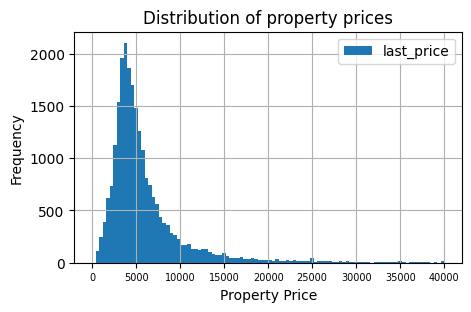

In [64]:
# Displaying the histogramDisplayшта the histogram
data.plot(y ='last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,40000))
plt.title('Distribution of property prices')
plt.xlabel('Property Price')
plt.ylabel('Frequency')
plt.xticks(rotation=0, fontsize=7)
plt.show();

In [65]:
# Calculating the percentage of properties with a price above 30 million
(data.loc[data['last_price'] > 30000]['last_price'].count()/data['last_price'].count()).round(3)

0.013

The data conforms to the parameters of a normal distribution; however, the mean value significantly differs from the median and tends to be closer to the third quartile value. This suggests that extremely high values have a considerable influence on the data. We will remove values above 30 million rubles, which account for slightly more than 1% of the data.

In [66]:
# Excluding properties with a total price above 30 million from the analysis
data_opt = data_opt.loc[data_opt['last_price'] <= 30000]

### Number of Rooms

In [67]:
# Displaying the data description of the column
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

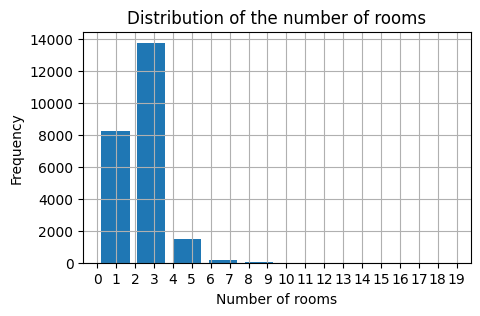

In [68]:
# Displaying the histogramDisplayшта the histogram
data['rooms'].plot(kind='hist', grid=True, figsize=(5, 3), rwidth=0.8)
plt.title('Distribution of the number of rooms')
plt.xlabel('Number of rooms')
plt.ylabel('Frequency')
plt.xticks(range(0, 20))
plt.show()

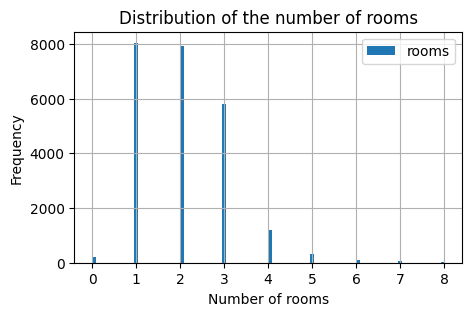

In [69]:
# Displaying the histogramDisplayшта the histogram
data.plot(y ='rooms', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,8))
plt.title('Distribution of the number of rooms')
plt.xlabel('Number of rooms')
plt.ylabel('Frequency')
plt.show()

In [70]:
# Calculating the percentage of properties with more than 6 rooms
(data.loc[data['rooms'] > 6]['rooms'].count()/data['rooms'].count()).round(3)

0.004

In [71]:
# Calculating the percentage of properties with zero rooms
(data.loc[data['rooms'] == 0]['rooms'].count()/data['rooms'].count()).round(3)

0.008

The data corresponds to the parameters of a normal distribution, with the mean value almost equal to the median. We'll remove values exceeding 6, which account for less than 1% of the data, as well as rare values of 0 rooms that appear to be erroneous.

In [72]:
# Excluding properties with 0 rooms from the analysis, as well as those with more than 6 rooms
data_opt = data_opt.loc[(data_opt['rooms'] <= 6) & (data_opt['rooms'] != 0)]

### Ceiling Height

In [73]:
# Displaying the data description of the column
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

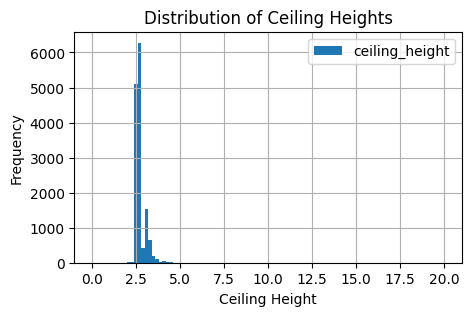

In [74]:
# Displaying the histogramDisplayшта the histogram
data.plot(y ='ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,20))
plt.title('Distribution of Ceiling Heights')
plt.xlabel('Ceiling Height')
plt.ylabel('Frequency')
plt.show();

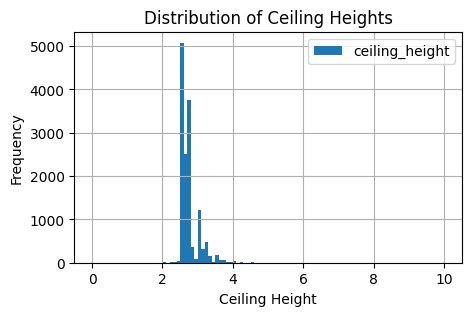

In [75]:
# Displaying the histogramDisplayшта the histogram
data.plot(y ='ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,10))
plt.title('Distribution of Ceiling Heights')
plt.xlabel('Ceiling Height')
plt.ylabel('Frequency')
plt.show();

In [76]:
# Displaying rows with ceiling heights above 20 meters
data.loc[data['ceiling_height'] > 20]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,square_metre_price,weekday,month,year,floor_category
355,17,3600.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,False,False,9.00,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259.0,Large,65.217,3,7,2018,other
3148,14,2900.0,75.0,2018-11-12,3,32.0,3,53.0,2,True,False,False,8.00,0,Волхов,NaN,NaN,0,NaN,0,NaN,NaN,Extra_Large,38.667,0,11,2018,other
4643,0,4300.0,45.0,2018-02-01,2,25.0,9,30.0,2,True,False,False,7.00,1,Санкт-Петербург,12016.0,13.0,1,658.0,1,331.0,181.0,Medium,95.556,3,2,2018,other
4876,7,3000.0,25.0,2017-09-27,0,27.0,25,17.0,17,True,False,True,8.25,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,28.0,Small,120.000,2,9,2017,other
5076,0,3850.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,False,False,5.50,0,Санкт-Петербург,29686.0,8.0,3,397.0,1,578.0,7.0,Small,126.230,2,10,2018,first
5246,0,2500.0,54.0,2017-10-13,2,27.0,5,30.0,3,True,False,False,9.00,2,деревня Мины,NaN,NaN,0,NaN,0,NaN,540.0,Large,46.296,4,10,2017,other
5669,4,4400.0,50.0,2017-08-08,2,26.0,9,21.3,3,True,False,False,7.00,2,Санкт-Петербург,28981.0,11.0,1,305.0,0,NaN,267.0,Medium,88.000,1,8,2017,other
5807,17,8150.0,80.0,2019-01-09,2,27.0,36,41.0,13,True,False,False,12.00,5,Санкт-Петербург,18732.0,20.0,0,NaN,3,80.0,38.0,Extra_Large,101.875,2,1,2019,other
6246,6,3300.0,44.4,2019-03-25,2,25.0,5,31.3,5,True,False,False,5.70,0,Кронштадт,68923.0,51.0,1,417.0,2,73.0,NaN,Medium,74.324,0,3,2019,last
9379,5,3950.0,42.0,2017-03-26,3,25.0,5,30.0,2,True,False,False,5.20,0,Санкт-Петербург,11647.0,14.0,0,NaN,0,NaN,NaN,Medium,94.048,6,3,2017,other


The data conforms to the parameters of a normal distribution, with the mean not significantly differing from the median. However, a small number of data were found with ceiling heights exceeding 20 meters. It can be assumed that in this case, there might be incorrect data entry, and for instance, 25 meters could actually be 2.5 meters. Let's correct these data values:

In [77]:
# Dividing by 10 the ceiling heights above 20 m in the filtered dataset
data_opt.loc[data_opt['ceiling_height'] > 20, 'ceiling_height'] = data_opt['ceiling_height']/10

Displaying the rows with ceiling heights less than 2 meters.

In [78]:
data_opt.loc[data['ceiling_height'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,square_metre_price,weekday,month,year,floor_category
5712,5,1500.0,42.8,2017-08-14,2,1.20,2,27.5,1,True,False,False,5.20,0,поселок городского типа Мга,NaN,NaN,0,NaN,0,NaN,248.0,Medium,35.047,0,8,2017,first
16934,5,4100.0,40.0,2017-10-17,1,1.75,37,17.4,5,True,False,False,8.34,0,Санкт-Петербург,18732.0,20.0,0,NaN,3,80.0,71.0,Small,102.500,1,10,2017,other
22590,16,6000.0,55.0,2018-10-31,2,1.00,12,32.4,7,True,False,False,10.00,0,Санкт-Петербург,33053.0,14.0,2,293.0,2,289.0,13.0,Large,109.091,2,10,2018,other


Since these data points seem like outliers and their number is negligible, let's remove these data values from further analysis.

In [79]:
# Excluding properties with ceiling height greater than 2 meters (considering the presence of missing values)
data_opt = data_opt.loc[(data_opt['ceiling_height'] >= 2.00) | (data_opt['ceiling_height'].isna())]

### Floor Category (First, Last, Other)

In [80]:
# Displaying the data description of the column
data['floor_category'].describe()

count     23699
unique        3
top       other
freq      17363
Name: floor_category, dtype: object

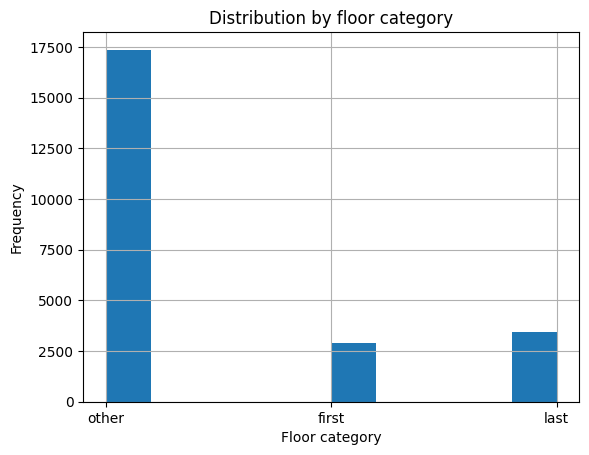

In [81]:
# Displaying the histogramDisplayшта the histogram
data['floor_category'].hist()
plt.title('Distribution by floor category')
plt.xlabel('Floor category')
plt.ylabel('Frequency')
plt.show();

The distribution seems quite logical, without any anomalous values. The largest number of real estate properties are neither on the first nor on the last floor.

### Total Number of Floors in the Building

In [82]:
# Displaying the data description of the column
data['floors_total'].describe()

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

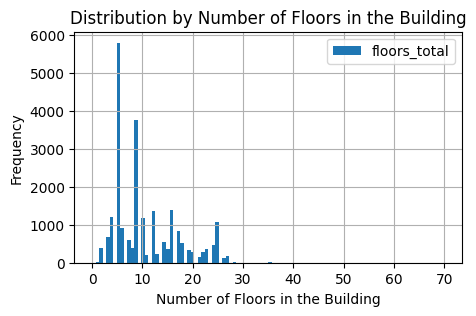

In [83]:
# Displaying the histogramDisplayшта the histogram
data.plot(y ='floors_total', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,70))
plt.title('Distribution by Number of Floors in the Building')
plt.xlabel('Number of Floors in the Building')
plt.ylabel('Frequency')
plt.show();

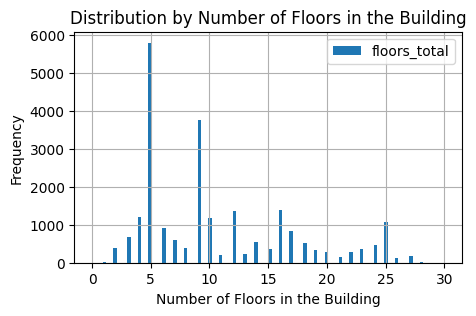

In [84]:
# Displaying the histogramDisplayшта the histogram
data.plot(y ='floors_total', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,30))
plt.title('Distribution by Number of Floors in the Building')
plt.xlabel('Number of Floors in the Building')
plt.ylabel('Frequency')
plt.show();

In [85]:
# Displaying rows with properties in buildings taller than 40 floors
data.loc[data['floors_total'] > 40]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,square_metre_price,weekday,month,year,floor_category
2253,12,3800.0,45.5,2018-06-28,2,2.88,60,27.4,4,True,False,False,7.4,0,Кронштадт,67763.0,49.0,2,342.0,3,614.0,166.0,Medium,83.516,3,6,2018,other
16731,9,3978.0,40.0,2018-09-24,1,2.65,52,10.5,18,True,False,False,14.0,0,Санкт-Петербург,20728.0,13.0,1,793.0,0,NaN,45.0,Small,99.450,0,9,2018,other


The average value does not differ significantly from the median. There are two significant peaks in the data - at 5 and 9 floors, which are typical for urban buildings. However, there are two outliers with extremely high values - 52 and 60 floors. According to data from open sources, there are no residential buildings of such height in the Leningrad region. Therefore, we will remove these data points from the dataset for further analysis.

In [86]:
# Excluding from analysis properties located in buildings with more than 40 floors
data_opt = data_opt.loc[data_opt['floors_total'] <= 40]

### Distance to the City Center 

In [87]:
# Displaying the data description of the column
data['cityCenters_nearest'].describe()

count    18180.000000
mean        14.184818
std          8.616194
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64

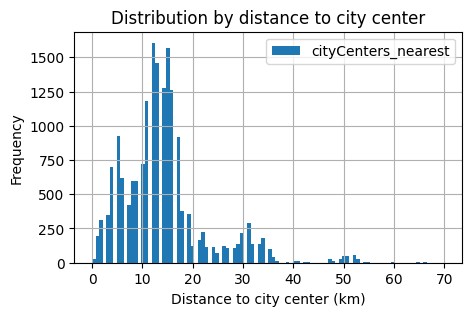

In [88]:
# Displaying the histogramDisplayшта the histogram
data.plot(y ='cityCenters_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,70))
plt.title('Distribution by distance to city center')
plt.xlabel('Distance to city center (km)')
plt.ylabel('Frequency')
plt.show();

The data conforms to the parameters of a normal distribution, with the mean not significantly differing from the median. The majority of real estate properties are located at a distance of 10 to 18 km, which is typical for a large city like St. Petersburg. We will keep the existing data without any adjustments.

### Distance to the Nearest Park

In [89]:
# Displaying the data description of the column
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

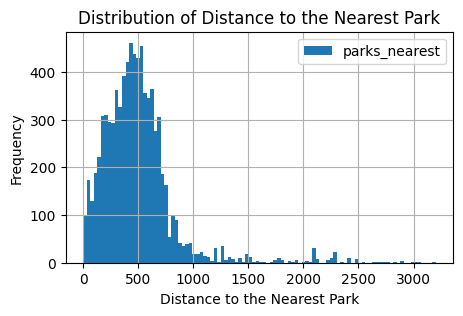

In [90]:
# Displaying the histogramDisplayшта the histogram
data.plot(y ='parks_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,3200))
plt.title('Distribution of Distance to the Nearest Park')
plt.xlabel('Distance to the Nearest Park')
plt.ylabel('Frequency')
plt.show();

In [91]:
# Calculating the percentage of properties with a distance to the nearest park greater than 2 km
(data.loc[data['parks_nearest'] > 2000]['parks_nearest'].count()/data['parks_nearest'].count()).round(3)

0.014

The data conforms to the parameters of a normal distribution, with the mean slightly, but noticeably, higher than the median. The most frequent value, peaking around 500 meters, seems entirely logical and corresponds to reality. To bring the mean value closer to the median, we decided to remove outliers and rare values exceeding 2 km, which make up less than 1.5% of the total dataset.

In [92]:
# Excluding properties with a distance to the nearest park greater than 2 km from the analysis 
# (taking into consideration missing values)
data_opt = data_opt.loc[(data_opt['parks_nearest'] <= 2000) | (data_opt['parks_nearest'].isna())]

### Speed of Apartment Sales

Let's examine how quickly apartments were sold (column `days_exposition`). This parameter shows how many days each listing was active:

In [93]:
# Displaying the data description of the column
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

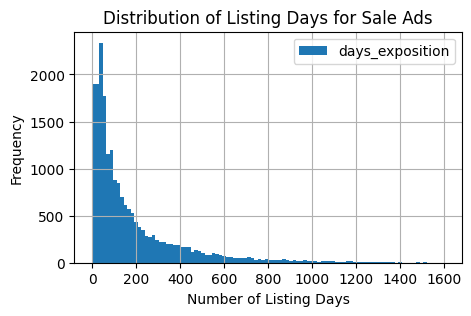

In [94]:
# Displaying the histogramDisplayшта the histogram
data.plot(y ='days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,1600))
plt.title('Distribution of Listing Days for Sale Ads')
plt.xlabel('Number of Listing Days')
plt.ylabel('Frequency')
plt.show();

In [95]:
# Calculating the percentage of properties listed for more than 1000 days
(data.loc[data['days_exposition'] > 1000]['days_exposition'].count()/data['days_exposition'].count()).round(3)

0.013

The resulting histogram represents a Poisson distribution, which describes the number of events within a unit of time. Typically, a sale takes around 95 days (median value). Sales within 45 days can be considered quick, while those over 232 days are lengthy. However, a small number of very long sales, up to 1580 days, significantly distort the average value. We will remove the outliers and rare values over 1000 days, which account for about 1% of the total dataset.

In [96]:
# Excluding listings that have been on the market for more than 1000 days 
# (taking into consideration missing values)
data_opt = data_opt.loc[(data_opt['days_exposition'] <= 1000) | (data_opt['days_exposition'].isna())]

**Conclusion:** Overall, it can be concluded that most of the data in the columns corresponds to a normal distribution, while the dataset contains a small number of extremely high outlier values, which were excluded for further analysis.

- "Total area": typical values range from 25 to 60 square meters, values above 300 square meters were excluded.
- "Living area": typical values are 15-22 and 27-32 square meters. There is a low number of values in the range of 22-27 square meters (almost 90% of properties with this area are "apartments"). Rare values above 200 square meters were excluded.
- "Kitchen area": typical values are 5-15 square meters, values above 40 square meters were excluded as rare.
- "Price of the property": extremely high values did not significantly affect the analysis, most frequent values range from 3 to 6 million rubles. Values above 30 million were excluded for further analysis.
- "Number of rooms": typical values range from 1 to 3. Zero values were excluded from further analysis, as well as values above 6 rooms.
- "Ceiling height": presumably erroneous values above 20 meters were corrected, values below 2 meters were excluded.
- "Floor Category": no anomalies were found, the most frequent values are "other".
- "Total floors in the building": two peak values were identified (5 and 9 floors), which correspond to typical urban construction in Russia. Values above 40 were excluded as not matching reality.
- "Distance to city center": most frequent values are 10-18 km, which is typical for a large Russian city.
- "Distance to the nearest park": a peak value at 500 meters is typical, values above 2000 meters were excluded as rare.
- "Sale speed of properties": represents a Poisson distribution with peak values at 45, 60, and 90 days, which corresponds to standard publication times for properties within the "Yandex. Real Estate" service.

## Determining the Factors with the Greatest Influence on the Total Cost of the Property

Let's create plots that will show the dependence of the total cost of the property on the following parameters:

- Total area
- Living area
- Kitchen area
- Number of rooms
- Floor Category (first, last, other)
- Time of ad placement (day of the week, month, year)

### Total Area

Creating a pivot table showing the dependency of the total cost on the total area of the property, calculating the correlation between these two values, and plotting a diagram:

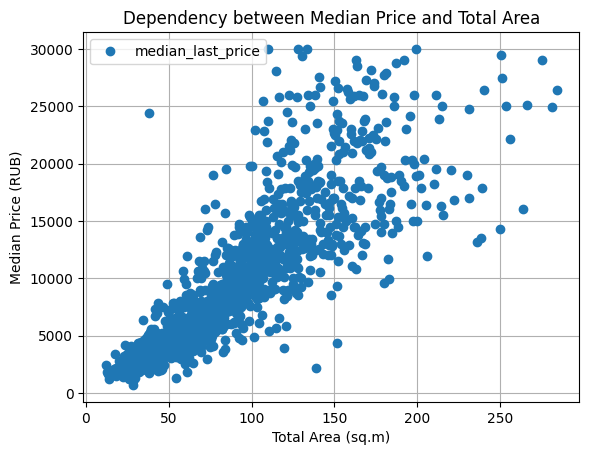


Correlation between total area and price: 0.78


In [97]:
# Creating a pivot table, grouping the data by total area
# and calculating the count and median price for each group
pivot_table_total_area = data_opt.pivot_table(index=['total_area'], 
                                              values=['last_price'], 
                                              aggfunc=['count', 'median'])

# Renaming the columns of the pivot table
pivot_table_total_area.columns = ['count', 'median_last_price']

# Visualiziing the pivot table
pivot_table_total_area.plot(y=['median_last_price'], style='o')
plt.title('Dependency between Median Price and Total Area')
plt.xlabel('Total Area (sq.m)')
plt.ylabel('Median Price (RUB)')
plt.grid(True)
plt.show()
print()

# Printing the correlation coefficient
print(f'Correlation between total area and price: {data_opt["total_area"].corr(data_opt["last_price"]):.2f}')

The analysis of the diagram allows us to conclude that the correlation between the total cost of the property and its total area is linear and particularly pronounced for properties with a total area of up to 130 square meters, with a gradual decrease in the impact as the total area increases.

### Living Area

Creating a pivot table showing the dependency of the total cost on the living area of the property, calculating the correlation between these two values, and plotting a diagram:

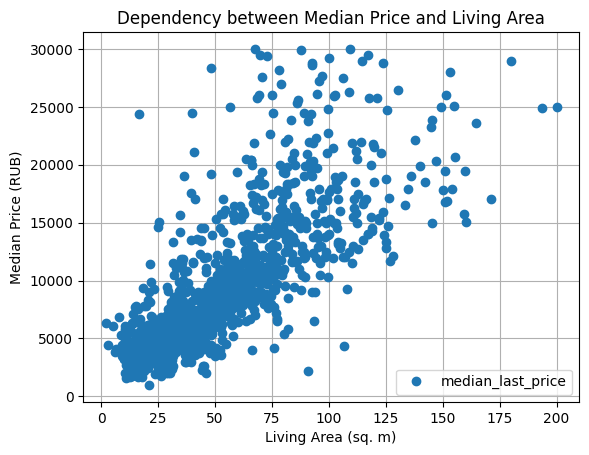


Correlation coefficient between living area and price: 0.67


In [98]:
# Creating a pivot table, grouping the data by living area
# and calculating the count and median price for each group
pivot_table_living_area = data_opt.pivot_table(index=['living_area'], 
                                               values=['last_price'], 
                                               aggfunc=['count', 'median'])

# Renaming the columns of the pivot table
pivot_table_living_area.columns = ['count', 'median_last_price']

# Visualizing the pivot table
pivot_table_living_area.plot(y=['median_last_price'], style='o')
plt.title('Dependency between Median Price and Living Area')
plt.xlabel('Living Area (sq. m)')
plt.ylabel('Median Price (RUB)')
plt.grid(True)
plt.show()
print()

# Displaying the correlation coefficient
print(f'Correlation coefficient between living area and price: {data_opt["living_area"].corr(data_opt["last_price"]):.2f}')

The indicators of living area and total cost have slightly less correlation, but it still carries a direct and linear nature, as reflected in the diagram. The linear relationship is particularly strong for properties with a living area of up to 75 square meters.

### Kitchen Area

Creating a pivot table showing the dependency of the total cost on the kitchen area of the property, calculating the correlation between these two values, and plotting a diagram:

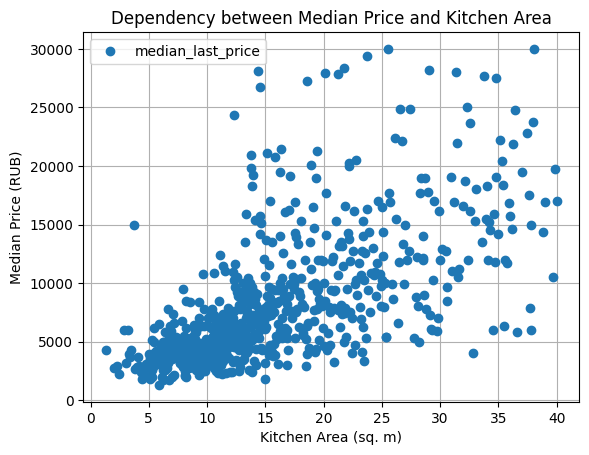


Correlation between kitchen area and price: 0.59


In [99]:
# Creating a pivot table, grouping the data by kitchen area
# and calculating the count and median price for each group
pivot_table_kitchen_area = data_opt.pivot_table(index=['kitchen_area'],
                                                values=['last_price'],
                                                aggfunc=['count', 'median'])

# Renaming the columns of the pivot table
pivot_table_kitchen_area.columns = ['count', 'median_last_price']

# Visualizng the pivot table
pivot_table_kitchen_area.plot(y=['median_last_price'], style='o')
plt.title('Dependency between Median Price and Kitchen Area')
plt.xlabel('Kitchen Area (sq. m)')
plt.ylabel('Median Price (RUB)')
plt.grid(True)
plt.show()
print()

# Displaying the correlation coefficient
print(f'Correlation between kitchen area and price: {data_opt["kitchen_area"].corr(data_opt["last_price"]):.2f}')

The kitchen area and total price indicators have a lower correlation compared to the dependence of price on total and living areas. However, the correlation still exists, as shown in the diagram. The linear relationship is especially pronounced for properties with a kitchen area of up to 15 square meters.

### Number of Rooms

Creating a pivot table showing the dependency of the total cost on the number of rooms of the property, calculating the correlation between these two values, and plotting a diagram:

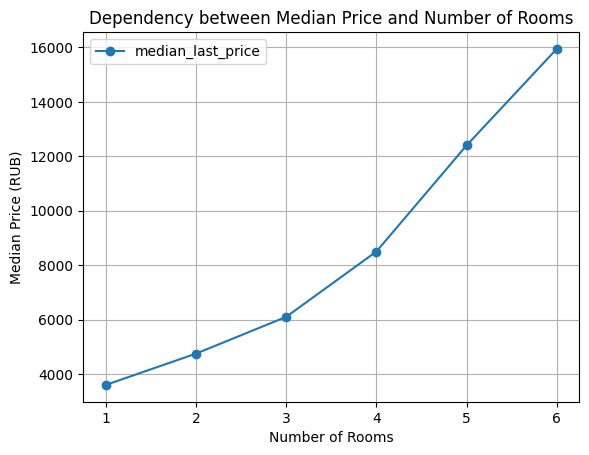


Degree of correlation between the number of rooms and price: 0.50


In [100]:
# Creating a pivot table, grouping data by the number of rooms
# and calculating the count and median price for each group
pivot_table_rooms = data_opt.pivot_table(index=['rooms'], 
                                         values=['last_price'], 
                                         aggfunc=['count', 'median'])

# Renaming the columns of the pivot table
pivot_table_rooms.columns = ['count', 'median_last_price']

# Visualizing the pivot table
pivot_table_rooms.plot(y=['median_last_price'], style='-o')
plt.title('Dependency between Median Price and Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Price (RUB)')
plt.grid(True)
plt.show()
print()

# Displaying the correlation degree
print(f'Degree of correlation between the number of rooms and price: {data_opt["rooms"].corr(data_opt["last_price"]):.2f}')

There is a certain correlation between the number of rooms and the total cost of the property. It is worth noting that in the range of 1 to 4 rooms, the property cost increases almost linearly, while adding each subsequent room leads to a more significant increase in cost.

### Floor Category (First, Last, Other)

Creating a pivot table showing the dependency of the total cost on the floor category of the property, calculating the correlation between these two values, and plotting a diagram:

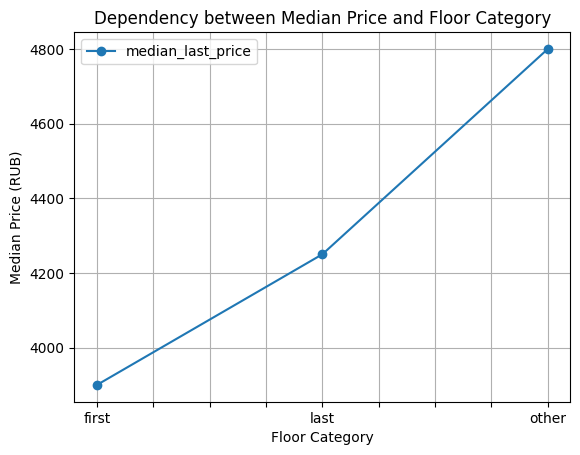

In [101]:
# Creating a pivot table grouping data by floor category
# and calculating the count and median price for each group
pivot_table_floor_category = data_opt.pivot_table(index=['floor_category'], 
                                                  values=['last_price'], 
                                                  aggfunc=['count', 'median'])

# Renaming the columns of the pivot table
pivot_table_floor_category.columns = ['count', 'median_last_price']

# Visualizing the pivot table
pivot_table_floor_category.plot(y=['median_last_price'], style='-o')
plt.title('Dependency between Median Price and Floor Category')
plt.xlabel('Floor Category')
plt.ylabel('Median Price (RUB)')
plt.grid(True)
plt.show()
print();

Based on the resulting diagram, we can conclude that the fact that a property is located on the first floor has the strongest impact on its price, significantly reducing its overall value. Additionally, properties located on the top floor are also less preferable compared to others, which is reflected in the overall property price.

### Time of Ad Placement (Day of the Week, Month, Year)

#### Day of the Week of Ad Placement

Let's create a pivot table showing the dependency of the total cost on the `day of the week` the property was listed and plot a diagram:

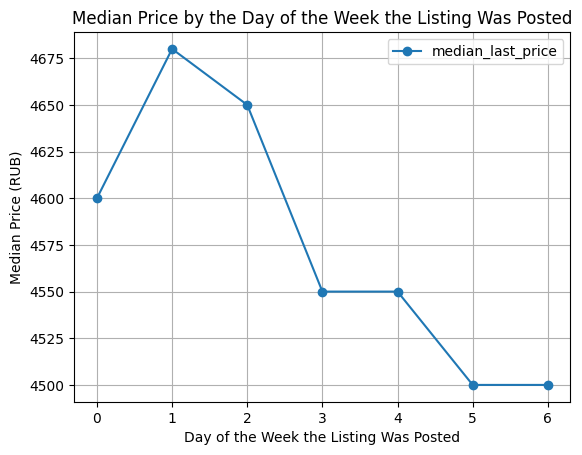

In [102]:
# Creating a pivot table, grouping data by the day of the week
# and calculating the count and median price for each group
pivot_table_day_exposition = data_opt.pivot_table(index=['weekday'], 
                                                  values=['last_price'], 
                                                  aggfunc=['count', 'median'])

# Renaming the columns of the pivot table
pivot_table_day_exposition.columns = ['count', 'median_last_price']

# Visualizing the pivot table
pivot_table_day_exposition.plot(y=['median_last_price'], style='-o')
plt.title('Median Price by the Day of the Week the Listing Was Posted')
plt.xlabel('Day of the Week the Listing Was Posted')
plt.ylabel('Median Price (RUB)')
plt.grid(True)
plt.show()
print();

According to the graph, listings for the most expensive properties are posted on Tuesday and Wednesday, while the lowest prices are for properties posted on weekends (Saturday and Sunday). It can be assumed that during the workweek, listings are predominantly posted by real estate agencies and realtors, whereas on Saturday, the primary source of listings is direct property owners.

#### Month of Ad Placement

Let's create a pivot table showing the dependency of the total cost on the `month` the property was listed and plot a diagram:

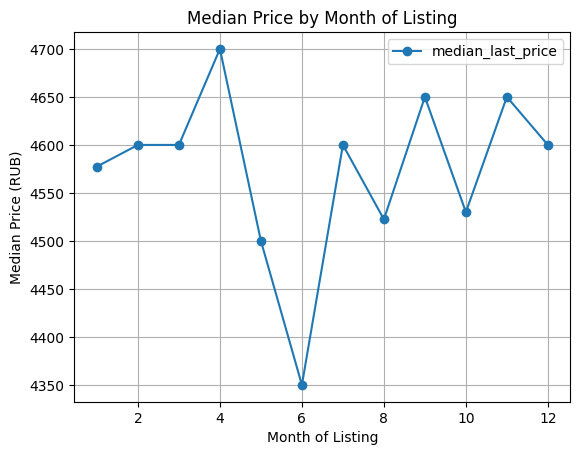

In [103]:
# Creating a pivot table, grouping data by month
# and calculating the count and median price for each group
pivot_table_month_exposition = data_opt.pivot_table(index = ['month'], 
                                              values=['last_price'], 
                                              aggfunc = ['count', 'median'])

# Renaming the columns of the pivot table
pivot_table_month_exposition.columns = ['count', 'median_last_price']

# Visualizing the pivot table
pivot_table_month_exposition.plot(y=['median_last_price'], style='-o')
plt.title('Median Price by Month of Listing')
plt.xlabel('Month of Listing')
plt.ylabel('Median Price (RUB)')
plt.grid(True)
plt.show()
print();

As with the days of the week, there is no direct linear correlation between the month of listing and the property price, but there are months with particularly high and low values. For example, April, September, and November are characterized by high prices. This can be explained by the seasonality of the real estate market, where the most popular months for transactions are mid-spring, the beginning of the school year, and the end of the calendar year (high demand leads to higher prices). Conversely, the lowest prices are observed in June, marking the beginning of the vacation season.

#### Year of Ad Placement

Let's create a pivot table showing the dependency of the total cost on the `year` the property was listed and plot a diagram:

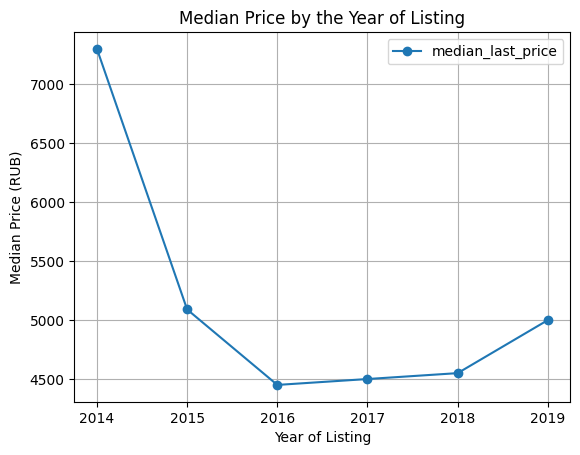

In [104]:
# Creating a pivot table, grouping data by year
# and calculating the count and median price for each group
pivot_table_year_exposition = data_opt.pivot_table(index=['year'], 
                                                   values=['last_price'], 
                                                   aggfunc=['count', 'median'])

# Renaming the columns of the pivot table
pivot_table_year_exposition.columns = ['count', 'median_last_price']

# Visualizing the pivot table
pivot_table_year_exposition.plot(y=['median_last_price'], style='-o')
plt.title('Median Price by the Year of Listing')
plt.xlabel('Year of Listing')
plt.ylabel('Median Price (RUB)')
plt.grid(True)
plt.show()
print()

The dependency of total property cost by year is not direct and linear; however, it fully reflects the economic condition of the country during the specified period, closely mirroring the curve of Russia's GDP from 2014 to 2019.

**Conclusion:** Based on the data analysis, it can be concluded that the total area of a property has the greatest impact on its total cost according to the presented dataset. The correlation between these two parameters is especially pronounced for properties with an area up to 130 square meters.

Next, the dependency gradually decreases when moving from the "Total Area" parameter to the following parameters:

"Living Area" (correlation is especially visible in the range up to 75 square meters)
"Kitchen Area" (correlation is expressed only for properties with a kitchen area up to 15 square meters).
For the "Number of Rooms" parameter, the cost of the property increases linearly in the range from 1 to 4 rooms, and the addition of each subsequent room leads to a more significant increase in cost.

Among floors, the least preferred is the first floor, which is reflected in property prices. The highest-priced properties are those that are not located on the first or last floor.

The lowest-priced properties are listed at the end of the week (Saturday and Sunday), while the highest-priced properties are listed on Tuesday and Wednesday. The months in which the cost of listed properties sharply increases are April, September, and November, with the lowest prices for properties listed in June, which is typical for the seasonal real estate market.

Finally, the dependency of the total property cost by year closely mirrors the curve of Russia's GDP from 2014 to 2019.

## Calculating the Minimum, Average, and Maximum Price per Square Meter

### Average Price per Square Meter

Let's calculate the average price per square meter in the top 10 settlements with the highest number of listings. We'll identify the settlements with the highest and lowest price per square meter.

First, let's identify the top 10 settlements with the highest number of listings and display an intermediate dataframe containing information only for these settlements:

In [105]:
# Displaying the top 10 settlements by the number of listings
most_frequent_locations = data_opt['locality_name'].value_counts().head(10)
most_frequent_locations = most_frequent_locations.to_frame()
most_frequent_locations

,count
locality_name,
Санкт-Петербург,14874
поселок Мурино,523
поселок Шушары,431
Всеволожск,388
Пушкин,355
Колпино,333
поселок Парголово,321
Гатчина,307
деревня Кудрово,278


In [106]:
# Creating a filtered dataframe with data for the top 10 settlements by the number of listings
data_opt_frequent_locations = data_opt.loc[data_opt['locality_name'].isin(most_frequent_locations.index)]

Let's create a pivot table with information about the average price per square meter in thousands of rubles in the top 10 settlements with the highest number of listings. We'll sort the results in descending order and round them to 3 decimal places:

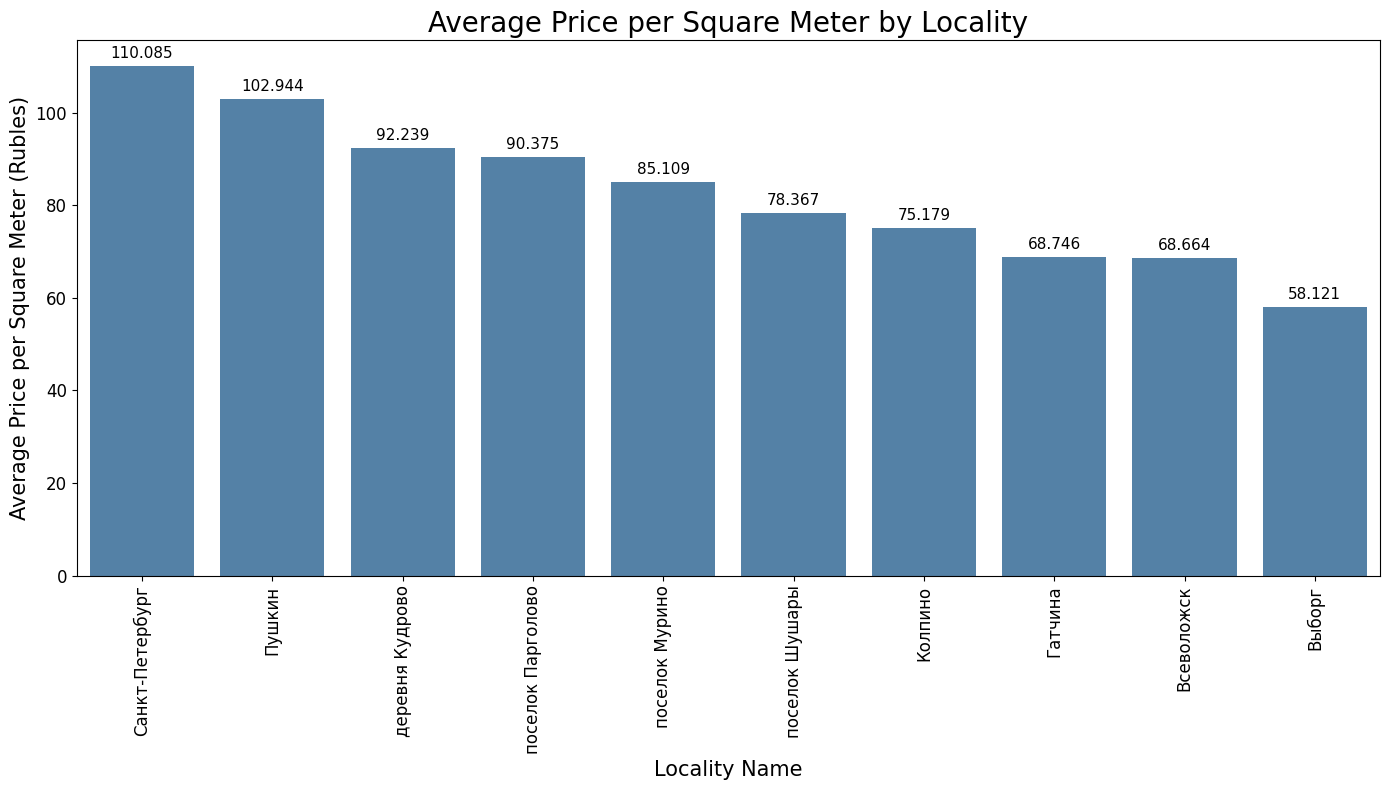

In [107]:
# Creating a pivot table with average prices per sq.m for the top 10 localities by number of listings
pivot_table_mean_square_metre_price = data_opt_frequent_locations.pivot_table(index=['locality_name'],
                                                                              values=['square_metre_price'],
                                                                              aggfunc='mean')
pivot_table_mean_square_metre_price = pivot_table_mean_square_metre_price.sort_values(by='square_metre_price',
                                                                                      ascending=False).round(3)

# Plotting a bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=pivot_table_mean_square_metre_price.index,
                 y=pivot_table_mean_square_metre_price['square_metre_price'],
                 color='steelblue')

# Adding data labels on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=11)

# Adding labels
plt.title('Average Price per Square Meter by Locality', fontsize=20)
plt.xlabel('Locality Name', fontsize=15)
plt.ylabel('Average Price per Square Meter (Rubles)', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Minimum and Maximum Price per Square Meter

Let's identify the localities with the highest and lowest square meter prices based on averaged values, cleaned from outliers and anomalies.

In [108]:
# Forming a pivot table to find the average square meter prices in all localities
pivot_table_minmax_square_metre_price = data_opt.pivot_table(index=['locality_name'],
                                                             values=['square_metre_price'],
                                                             aggfunc='mean')

# Sorting the pivot table in descending order of square meter prices
pivot_table_sorted = pivot_table_minmax_square_metre_price.sort_values(by='square_metre_price',
                                                                       ascending=False).round(3)

# Finding the maximum value of square meter price and its index
max_value = pivot_table_sorted['square_metre_price'].max()
max_index = pivot_table_sorted['square_metre_price'].idxmax()

# Finding the minimum value of square meter price and its index
min_value = pivot_table_sorted['square_metre_price'].min()
min_index = pivot_table_sorted['square_metre_price'].idxmin()

print()
print(f"The maximum price per square meter {max_value} is in the locality {max_index}")
print(f"The minimum price per square meter {min_value} is in the locality {min_index}")
print()


The maximum price per square meter 115.123 is in the locality Зеленогорск
The minimum price per square meter 11.206 is in the locality деревня Старополье



As seen from the data above:

- The highest price per square meter in the Leningrad region among the localities with the highest number of listings (top 10) is recorded in Saint Petersburg (the capital of the region), Pushkin (formerly Tsarskoye Selo until 1918), and the village of Kudrovo (adjacent to the territory of Saint Petersburg);
- The most expensive locality for real estate purchase in the Leningrad region based on averaged values is Zelenogorsk, an intra-city municipal formation within the Kurortny District of Saint Petersburg, while the most affordable real estate offers in terms of price per square meter are in the village of Staropolye.

### Calculating the average price per kilometer within Saint Petersburg

Earlier, we calculated the distance to the city center in kilometers. Now let's filter the apartments in Saint Petersburg using the locality_name column and calculate the average price per kilometer.

To start, let's create an intermediate dataframe containing information only about real estate properties located in Saint Petersburg:

In [109]:
SPB_data_opt = data_opt.loc[data_opt['locality_name'] == 'Санкт-Петербург']

Let's create a pivot table that reflects the average total cost of real estate properties as the distance from the city center increases, and display a diagram illustrating the obtained data:

<Figure size 1400x800 with 0 Axes>

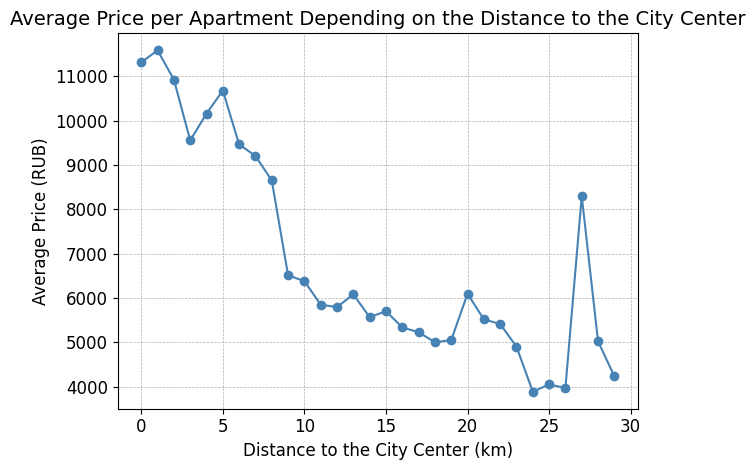

In [110]:
# Forming a pivot table with average price data for each kilometer from the city center
pivot_table_km_mean = SPB_data_opt.pivot_table(index=['cityCenters_nearest'], 
                                               values=['last_price'], 
                                               aggfunc='mean')
# Displaying the diagram
plt.figure(figsize=(14, 8))
ax = pivot_table_km_mean.plot(y='last_price', kind='line', legend=False, color='steelblue', marker='o')
ax.set_title('Average Price per Apartment Depending on the Distance to the City Center', fontsize=14)
ax.set_xlabel('Distance to the City Center (km)', fontsize=12)
ax.set_ylabel('Average Price (RUB)', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

From the diagram, it can be seen that the price of properties steadily decreases as the distance from the city center increases from 0 to 25 km. However, there is a significant peak in the range of 25-30 km. It can be assumed that the main part of this peak value consists of private houses and properties in elite areas, which are still within the territory of Saint Petersburg but differ favorably from the main urban development in terms of their ecological parameters.

## Research Results

Based on the conducted analysis, the most common reason for missing data appears to be a technical error during autofilling, which can be rectified by re-uploading the data. Overall, the provided data is sufficient for conducting the research.

Most of the data in the columns corresponds to parameters of normal distribution. However, erroneous or excessively high values were discarded for further analysis purposes.

The most frequent properties are those with a total area of 25-60 square meters, with a living area ranging from 15-22 square meters and 27-32 square meters. Apartments mainly fall within the range of living areas from 22-27 square meters. The typical kitchen size is between 5-15 square meters, with property prices ranging from 3-6 million rubles and 1-3 rooms. Generally, apartments are not located on the first or last floors but are often in buildings with 5 or 9 floors, situated 10-18 km away from the city center, with the nearest park around 500 meters from the building.

For properties with a small to medium total area of up to 130 square meters, a living area of up to 75 square meters, kitchen size up to 15 square meters, and up to 4 rooms, the area and number of rooms directly influence the total price. As the property size increases, the correlation decreases, and other property parameters start to have a stronger impact on the price.

The location on the first and last floors affects the overall price negatively.

The real estate market in Leningrad region shows seasonality, with peaks of high-value property listings (due to increased demand) in April, September, and November. It also correlates directly with the overall economic situation in the country.

The localities with the highest square meter price are Zelenogorsk and Saint Petersburg, while the cheapest real estate is found in the village of Staropolye.

As the distance from the center increases, property prices steadily decrease within the range of 0-25 km. Beyond that, there is a peak in prices for properties located in elite suburban areas around 25-30 km from the center.